In [1]:
import pandas as pd
import numpy as np
import os

#os.chdir("/Users/Jaebin/Documents/Stevens Fall 2019/Applied Analytics/") #set general working directory

county = pd.read_csv("//Users/Pooja/Downloads/BIA610_appliedAnalytics/CountyBusinessPatterns2016/data/Completecountyfile.csv") # specific directory for where the dataset is

In [2]:
county.columns

Index(['fipstate', 'fipscty', 'naics', 'empflag', 'emp_nf', 'emp', 'qp1_nf',
       'qp1', 'ap_nf', 'ap', 'est', 'n1_4', 'n5_9', 'n10_19', 'n20_49',
       'n50_99', 'n100_249', 'n250_499', 'n500_999', 'n1000', 'n1000_1',
       'n1000_2', 'n1000_3', 'n1000_4', 'censtate', 'cencty'],
      dtype='object')

In [3]:
county.shape

(2124893, 26)

In [4]:
county['fipstate'].value_counts().head()

48    145166
13     92273
51     86387
37     79650
39     79107
Name: fipstate, dtype: int64

In [5]:
# randomly sample 20000 samples
county = county.sample(300000).reset_index(drop = True)

In [6]:
county = county[(county.fipstate == 48)]

In [7]:
county.head()

,fipstate,fipscty,naics,empflag,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,...,n100_249,n250_499,n500_999,n1000,n1000_1,n1000_2,n1000_3,n1000_4,censtate,cencty
1,48,463,7113//,A,D,0,D,0,D,0,...,0,0,0,0,0,0,0,0,74,463
47,48,441,522291,NaN,J,35,H,242,G,954,...,0,0,0,0,0,0,0,0,74,441
61,48,19,332323,A,D,0,D,0,D,0,...,0,0,0,0,0,0,0,0,74,19
75,48,245,621492,C,D,0,D,0,D,0,...,0,0,0,0,0,0,0,0,74,245
91,48,61,425///,NaN,G,79,G,624,G,2727,...,0,0,0,0,0,0,0,0,74,61


In [8]:
# combine small size companies into one category
county["sz_small"] = county["n1_4"] + county["n5_9"] + county["n10_19"] + county["n20_49"] + county["n50_99"]

# combine medium size companies into one category
county["sz_med"] = county["n100_249"] + county["n250_499"] + county["n500_999"]

# combine large size companies into one category
county["sz_lrg"] = county["n1000_1"] + county["n1000_2"] + county["n1000_3"] + county["n1000_4"]

county = county.drop(columns = ["empflag", "emp_nf", "qp1_nf", "ap_nf", "censtate", "cencty",
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000", "n1000_1", "n1000_2", "n1000_3", "n1000_4"])

In [9]:
county.dtypes

fipstate     int64
fipscty      int64
naics       object
emp          int64
qp1          int64
ap           int64
est          int64
sz_small     int64
sz_med       int64
sz_lrg       int64
dtype: object

# for NACIS, removing "-" and "/" and converting to integers
# takes several minutes, you'll know when it's done from the icon on the window tab

for i in range(0,len(county["naics"])):
    a = str(county["naics"][i])
    if county["naics"][i] == "------":
        county["naics"][i] = 0
    elif "-" in county["naics"][i]:
        county["naics"][i] = int(a.replace("-", ""))        
    elif "/" in county["naics"][i]:
        county["naics"][i] = int(a.replace("/", ""))
    else:
        county["naics"][i] = int(a)

In [10]:
county.naics=county.naics.replace('-','',regex=True)
county.naics=county.naics.replace('/','',regex=True)

In [11]:
county.head()

,fipstate,fipscty,naics,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
1,48,463,7113,0,0,0,1,1,0,0
47,48,441,522291,35,242,954,13,13,0,0
61,48,19,332323,0,0,0,1,1,0,0
75,48,245,621492,0,0,0,5,5,0,0
91,48,61,425,79,624,2727,22,22,0,0


In [12]:
county = county.add_prefix('COUNTY_')


In [13]:
county.head()

,COUNTY_fipstate,COUNTY_fipscty,COUNTY_naics,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg
1,48,463,7113,0,0,0,1,1,0,0
47,48,441,522291,35,242,954,13,13,0,0
61,48,19,332323,0,0,0,1,1,0,0
75,48,245,621492,0,0,0,5,5,0,0
91,48,61,425,79,624,2727,22,22,0,0


In [14]:
county.columns = ['fipstate', 'COUNTY_fipscty', 'naics', 'COUNTY_emp',
       'COUNTY_qp1', 'COUNTY_ap', 'COUNTY_est', 'COUNTY_sz_small',
       'COUNTY_sz_med', 'COUNTY_sz_lrg']

## Your tasks

1. change the dataset your respective dataset
2. identify the columns and make sure the names are the same
3. if you have columns that aren't in the County data, use your judgement to drop or include it
4. go over the project proposal and understand exactly what we're trying to do
5. feel free to ask questions if you have. But if it's coding related, please try it on your own first
   and ask me or Sandeep if you really can't figure it out.

In [16]:
US_file = pd.read_csv('//Users/Pooja/Downloads/BIA610_appliedAnalytics/CountyBusinessPatterns2016/data/complete US file.csv',header=0, encoding='UTF-8')
US_file = US_file.drop(['uscode',  'empflag', 'emp_nf', 'qp1_nf',
       'ap_nf', 'f1_4', 'e1_4nf', 'e1_4', 'q1_4nf', 'q1_4',
       'a1_4nf', 'a1_4', 'f5_9', 'e5_9nf', 'e5_9', 'q5_9nf', 'q5_9',
       'a5_9nf', 'a5_9', 'f10_19', 'e10_19nf', 'e10_19', 'q10_19nf',
       'q10_19', 'a10_19nf', 'a10_19', 'f20_49', 'e20_49nf',
       'e20_49', 'q20_49nf', 'q20_49', 'a20_49nf', 'a20_49',
       'f50_99', 'e50_99nf', 'e50_99', 'q50_99nf', 'q50_99', 'a50_99nf',
       'a50_99', 'f100_249', 'e100_249nf', 'e100_249', 'q100_249nf',
       'q100_249', 'a100_249nf', 'a100_249', 'f250_499',
       'e250_499nf', 'e250_499', 'q250_499nf', 'q250_499', 'a250_499nf',
       'a250_499', 'f500_999', 'e500_999nf', 'e500_999',
       'q500_999nf', 'q500_999', 'a500_999nf', 'a500_999', 'f1000',
       'e1000nf', 'e1000', 'q1000nf', 'q1000', 'a1000nf', 'a1000'],axis=1)

In [17]:
# combine small size companies into one category
US_file["sz_small"] = US_file["n1_4"] + US_file["n5_9"] + US_file["n10_19"] + US_file["n20_49"] + US_file["n50_99"]

# combine medium size companies into one category
US_file["sz_med"] = US_file["n100_249"] + US_file["n250_499"] + US_file["n500_999"]

# combine large size companies into one category
US_file["sz_lrg"] = US_file["n1000"] 

US_file = US_file.drop(columns = [
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000" ])

In [18]:
US_file.naics=US_file.naics.replace('-','',regex=True)
US_file.naics=US_file.naics.replace('/','',regex=True)
#US_file.lfo=US_file.lfo.replace('-','',regex=True)

In [19]:
US_file.head()

,naics,lfo,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
0,,-,126752238,1604399617,6435142055,7757807,7568676,181471,7660
1,,C,55545767,888858468,3363492811,2114076,2014258,95948,3870
2,,Z,33631600,313406667,1405230530,3251536,3213293,37534,709
3,,S,4749707,37112956,157784272,899679,895824,3715,140
4,,P,14926406,167485849,682046178,883952,861739,21636,577


In [20]:
US_file = US_file.add_prefix('US_')



In [21]:
US_file.columns

Index(['US_naics', 'US_lfo', 'US_emp', 'US_qp1', 'US_ap', 'US_est',
       'US_sz_small', 'US_sz_med', 'US_sz_lrg'],
      dtype='object')

In [22]:
US_file.columns = ['naics', 'US_lfo', 'US_emp', 'US_qp1', 'US_ap', 'US_est',
       'US_sz_small', 'US_sz_med', 'US_sz_lrg']

In [23]:
state = pd.read_csv("//Users/Pooja/Downloads/BIA610_appliedAnalytics/CountyBusinessPatterns2016/data/complete state file.csv") # specific directory for where the dataset is

In [24]:
# combine small size companies into one category
state["sz_small"] = state["n1_4"] + state["n5_9"] + state["n10_19"] + state["n20_49"] + state["n50_99"]

# combine medium size companies into one category
state["sz_med"] = state["n100_249"] + state["n250_499"] + state["n500_999"]

# combine large size companies into one category
state["sz_lrg"] = state["n1000"] 
state = state.drop(columns = ["f500_999","f1_4","e1_4nf","empflag","q1_4nf","a1_4nf","e5_9nf","q5_9nf","a5_9nf","f10_19","e10_19nf","q10_19nf","a10_19nf","f20_49","e20_49nf","q20_49nf","emp_nf", "qp1_nf", "ap_nf", "censtate","f1000",
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000","e50_99nf","q50_99nf","a50_99nf","f100_249","e100_249nf","q100_249nf","a100_249nf","e250_499nf","q250_499nf","a250_499nf","e500_999nf","q500_999nf","a500_999nf","e1000nf","q1000nf","a1000nf",
                                    'e1_4', 'q1_4',
                               'a1_4', 'f5_9', 'e5_9', 'q5_9', 'a5_9', 'e10_19', 'q10_19', 'a10_19',
                               'e20_49', 'q20_49', 'a20_49nf', 'a20_49', 'f50_99', 'e50_99', 'q50_99',
                               'a50_99', 'e100_249', 'q100_249', 'a100_249', 'f250_499', 'e250_499',
                               'q250_499', 'a250_499', 'e500_999', 'q500_999', 'a500_999', 'e1000',
                               'q1000', 'a1000', ])

In [25]:
state.head()

,fipstate,naics,lfo,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
0,1,------,-,1673249,16667378,68970623,99584,97088,2404,92
1,1,------,C,766685,8868459,35219759,28682,27284,1349,49
2,1,------,Z,473577,4150278,18378077,37856,37302,541,13
3,1,------,S,67223,490235,2119042,11465,11413,50,2
4,1,------,P,180868,1518668,6433918,11941,11691,243,7


In [26]:
state.naics=state.naics.replace('-','',regex=True)

In [27]:
state.naics=state.naics.replace('/','',regex=True)

In [28]:
state.isnull().sum()

fipstate    0
naics       0
lfo         0
emp         0
qp1         0
ap          0
est         0
sz_small    0
sz_med      0
sz_lrg      0
dtype: int64

In [29]:
state.shape

(448310, 10)

In [30]:
#state['fipstate'].value_counts()


In [31]:
state = state.add_prefix('state_')



In [32]:
state.columns

Index(['state_fipstate', 'state_naics', 'state_lfo', 'state_emp', 'state_qp1',
       'state_ap', 'state_est', 'state_sz_small', 'state_sz_med',
       'state_sz_lrg'],
      dtype='object')

In [33]:
state.columns = ['fipstate', 'naics', 'state_lfo', 'state_emp', 'state_qp1',
       'state_ap', 'state_est', 'state_sz_small', 'state_sz_med',
       'state_sz_lrg']

In [34]:
county.columns

Index(['fipstate', 'COUNTY_fipscty', 'naics', 'COUNTY_emp', 'COUNTY_qp1',
       'COUNTY_ap', 'COUNTY_est', 'COUNTY_sz_small', 'COUNTY_sz_med',
       'COUNTY_sz_lrg'],
      dtype='object')

In [36]:
#metro = pd.read_csv("//Users/Pooja/Downloads/BIA610_appliedAnalytics/CountyBusinessPatterns2016/data/complete metropolitan area file.csv") # specific directory for where the dataset is

FileNotFoundError: [Errno 2] File b'//Users/Pooja/Downloads/BIA610_appliedAnalytics/CountyBusinessPatterns2016/data/complete metropolitan area file.csv' does not exist: b'//Users/Pooja/Downloads/BIA610_appliedAnalytics/CountyBusinessPatterns2016/data/complete metropolitan area file.csv'

In [35]:
# combine small size companies into one category
#metro["sz_small"] = metro["n1_4"] + metro["n5_9"] + metro["n10_19"] + metro["n20_49"] + metro["n50_99"]

# combine medium size companies into one category
#metro["sz_med"] = metro["n100_249"] + metro["n250_499"] + metro["n500_999"]

# combine large size companies into one category
#metro["sz_lrg"] = metro["n1000_1"] + metro["n1000_2"] + metro["n1000_3"] + metro["n1000_4"]



In [37]:
#metro = metro.drop(columns = ["empflag", "emp_nf", "qp1_nf", "ap_nf",
                               "n1_4", "n5_9", "n10_19", "n20_49", "n50_99", "n100_249", "n250_499",
                               "n500_999", "n1000", "n1000_1", "n1000_2", "n1000_3", "n1000_4"])

NameError: name 'metro' is not defined

In [37]:
#metro.naics=metro.naics.replace('-','',regex=True)
#metro.naics=metro.naics.replace('/','',regex=True)

In [38]:
#metro.head()

,msa,naics,emp,qp1,ap,est,sz_small,sz_med,sz_lrg
0,10100,,19533,173691,746190,1418,1390,27,1
1,10100,11,20,188,1161,8,8,0,0
2,10100,115,20,188,1161,8,8,0,0
3,10100,1151,20,188,1159,7,7,0,0
4,10100,11511,20,188,1159,7,7,0,0


In [39]:
#metro = metro.add_prefix('metro_')

In [40]:
#metro.columns

Index(['metro_msa', 'metro_naics', 'metro_emp', 'metro_qp1', 'metro_ap',
       'metro_est', 'metro_sz_small', 'metro_sz_med', 'metro_sz_lrg'],
      dtype='object')

In [41]:
#metro.columns = ['metro_msa', 'naics', 'metro_emp', 'metro_qp1', 'metro_ap',
       'metro_est', 'metro_sz_small', 'metro_sz_med', 'metro_sz_lrg']

In [38]:
cs = [county,state] #making a combined dataframe of train.csv and train_hospitalization

In [39]:
from functools import reduce

In [40]:
C_S = reduce(lambda left,right: pd.merge(left,right,on=['naics','fipstate']), cs) #reducting naics to 1 from 2

In [41]:
C_S.head()

,fipstate,COUNTY_fipscty,naics,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,state_lfo,state_emp,state_qp1,state_ap,state_est,state_sz_small,state_sz_med,state_sz_lrg
0,48,463,7113,0,0,0,1,1,0,0,-,11689,73573,308477,465,446,16,3
1,48,463,7113,0,0,0,1,1,0,0,C,3846,19321,87746,62,56,4,2
2,48,463,7113,0,0,0,1,1,0,0,Z,729,4274,20524,131,130,1,0
3,48,463,7113,0,0,0,1,1,0,0,S,1176,3851,18754,32,29,3,0
4,48,463,7113,0,0,0,1,1,0,0,P,2225,20459,92636,90,85,5,0


In [42]:
csus= [C_S,US_file]

In [43]:
S_US = reduce(lambda left,right: pd.merge(left,right,on='naics'), csus) #reducting naics to 1 from 2

In [44]:
S_US.head()

,fipstate,COUNTY_fipscty,naics,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,...,state_sz_med,state_sz_lrg,US_lfo,US_emp,US_qp1,US_ap,US_est,US_sz_small,US_sz_med,US_sz_lrg
0,48,463,7113,0,0,0,1,1,0,0,...,16,3,-,172611,1116933,5366064,7770,7491,256,23
1,48,463,7113,0,0,0,1,1,0,0,...,16,3,C,55528,360179,1630882,1021,923,88,10
2,48,463,7113,0,0,0,1,1,0,0,...,16,3,Z,16481,106515,558336,2484,2471,12,1
3,48,463,7113,0,0,0,1,1,0,0,...,16,3,S,9356,60540,271678,417,397,19,1
4,48,463,7113,0,0,0,1,1,0,0,...,16,3,P,46337,295053,1636630,968,912,47,9


In [45]:
S_US.shape

(888902, 26)

In [46]:
np.sqrt(881500)

938.88231424391

In [47]:
100*(1/938.88231424391)

0.1065096215818389

In [48]:

Texas_data= S_US


In [49]:
Texas_data['US_lfo'].head()

0    -
1    C
2    Z
3    S
4    P
Name: US_lfo, dtype: object

In [50]:
Texas_data['state_lfo'].head()

0    -
1    -
2    -
3    -
4    -
Name: state_lfo, dtype: object

COUNTY_Avg_AP_I annual Payroll of an industry = Annual Payroll for the industry / No. of establishments in
the industry

In [73]:
#Texas_data.COUNTY_Avg_AP_I.unique()

array([   0.        , 1361.41666667,   73.38461538, ..., 1765.33333333,
       3480.83333333,  248.        ])

In [74]:
#Texas_data.State_Avg_AP_I.unique()

array([ 663.39139785, 1415.25806452,  156.67175573, ..., 3582.2       ,
       4656.        ,  587.        ])

In [82]:
Texas_data['bins'] = pd.cut(x=Texas_data['COUNTY_Avg_AP_I'], bins=[7000, 14000, 20000])


In [83]:
#numerical.head()
Texas_data

,fipstate,COUNTY_fipscty,naics,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,...,US_qp1,US_ap,US_est,US_sz_small,US_sz_med,US_sz_lrg,COUNTY_Avg_AP_I,State_Avg_AP_I,US_Avg_AP_I,bins
0,48,463,7113,0,0,0,1,1,0,0,...,1116933,5366064,7770,7491,256,23,0.0,663.391398,690.613127,NaN
1,48,463,7113,0,0,0,1,1,0,0,...,360179,1630882,1021,923,88,10,0.0,663.391398,1597.337904,NaN
2,48,463,7113,0,0,0,1,1,0,0,...,106515,558336,2484,2471,12,1,0.0,663.391398,224.772947,NaN
3,48,463,7113,0,0,0,1,1,0,0,...,60540,271678,417,397,19,1,0.0,663.391398,651.505995,NaN
4,48,463,7113,0,0,0,1,1,0,0,...,295053,1636630,968,912,47,9,0.0,663.391398,1690.733471,NaN
5,48,463,7113,0,0,0,1,1,0,0,...,287455,1238583,2855,2765,88,2,0.0,663.391398,433.829422,NaN
6,48,463,7113,0,0,0,1,1,0,0,...,7191,29955,25,23,2,0,0.0,663.391398,1198.200000,NaN
7,48,463,7113,0,0,0,1,1,0,0,...,1116933,5366064,7770,7491,256,23,0.0,1415.258065,690.613127,NaN
8,48,463,7113,0,0,0,1,1,0,0,...,360179,1630882,1021,923,88,10,0.0,1415.258065,1597.337904,NaN
9,48,463,7113,0,0,0,1,1,0,0,...,106515,558336,2484,2471,12,1,0.0,1415.258065,224.772947,NaN


In [51]:
Texas_data['COUNTY_Avg_AP_I'] = Texas_data['COUNTY_ap'] / Texas_data['COUNTY_est']

In [52]:
Texas_data['State_Avg_AP_I'] = Texas_data['state_ap'] / Texas_data['state_est']

In [53]:
Texas_data['US_Avg_AP_I'] = Texas_data['US_ap'] / Texas_data['US_est']

In [54]:
First_review_data = Texas_data.sample(6254).reset_index(drop = True)

In [55]:
#First_review_data.to_csv("texas_data.csv")

In [56]:
First_review_data.dtypes

fipstate             int64
COUNTY_fipscty       int64
naics               object
COUNTY_emp           int64
COUNTY_qp1           int64
COUNTY_ap            int64
COUNTY_est           int64
COUNTY_sz_small      int64
COUNTY_sz_med        int64
COUNTY_sz_lrg        int64
state_lfo           object
state_emp            int64
state_qp1            int64
state_ap             int64
state_est            int64
state_sz_small       int64
state_sz_med         int64
state_sz_lrg         int64
US_lfo              object
US_emp               int64
US_qp1               int64
US_ap                int64
US_est               int64
US_sz_small          int64
US_sz_med            int64
US_sz_lrg            int64
COUNTY_Avg_AP_I    float64
State_Avg_AP_I     float64
US_Avg_AP_I        float64
dtype: object

In [57]:
Ctrain_Y=First_review_data['COUNTY_fipscty']
Strain_Y=First_review_data['fipstate']
#UStrain_Y=First_review_data['US_Avg_AP_I']

In [58]:
categorical = First_review_data.select_dtypes(include=['object']) 

In [59]:
categorical.columns

Index(['naics', 'state_lfo', 'US_lfo'], dtype='object')

In [60]:
naics=categorical['naics']



In [61]:
categorical = categorical.drop(columns=['naics'])

In [62]:
numerical = First_review_data.drop(columns=['naics', 'state_lfo', 'US_lfo','COUNTY_fipscty','fipstate'])

In [78]:
numerical.head()

,fipstate,COUNTY_fipscty,COUNTY_emp,COUNTY_qp1,COUNTY_ap,COUNTY_est,COUNTY_sz_small,COUNTY_sz_med,COUNTY_sz_lrg,state_emp,...,state_sz_small,state_sz_med,state_sz_lrg,US_emp,US_qp1,US_ap,US_est,US_sz_small,US_sz_med,US_sz_lrg
0,48,131,24,173,815,4,4,0,0,28037,...,4536,3,0,350443,1559923,6734986,45639,45600,39,0
1,48,411,4,39,167,4,4,0,0,61544,...,11123,49,1,1635,23378,96185,196,192,4,0
2,48,57,24,150,803,8,8,0,0,2637,...,182,5,0,74291,463575,1979366,22419,22409,8,2
3,48,241,0,0,0,2,2,0,0,116,...,40,0,0,13657,111712,499370,3134,3133,1,0
4,48,189,0,0,0,2,2,0,0,92,...,10,0,0,208283,1566642,6734311,7943,7536,405,2


In [64]:
from sklearn import preprocessing 

In [65]:
numerical = First_review_data.drop(columns=['naics', 'state_lfo', 'US_lfo','COUNTY_Avg_AP_I','State_Avg_AP_I','US_Avg_AP_I'])

In [66]:
numerical.dtypes

fipstate           int64
COUNTY_fipscty     int64
COUNTY_emp         int64
COUNTY_qp1         int64
COUNTY_ap          int64
COUNTY_est         int64
COUNTY_sz_small    int64
COUNTY_sz_med      int64
COUNTY_sz_lrg      int64
state_emp          int64
state_qp1          int64
state_ap           int64
state_est          int64
state_sz_small     int64
state_sz_med       int64
state_sz_lrg       int64
US_emp             int64
US_qp1             int64
US_ap              int64
US_est             int64
US_sz_small        int64
US_sz_med          int64
US_sz_lrg          int64
dtype: object

In [67]:
standardized_num = preprocessing.scale(numerical)

In [68]:
standardized_num = pd.DataFrame(standardized_num)

In [69]:
CAT_DATA = pd.get_dummies(categorical)

In [70]:
FINAL_Texas_DATA = pd.concat([CAT_DATA,standardized_num,naics],axis=1)

In [71]:
FINAL_Texas_DATA.head()

,state_lfo_-,state_lfo_C,state_lfo_G,state_lfo_N,state_lfo_O,state_lfo_P,state_lfo_S,state_lfo_Z,US_lfo_-,US_lfo_C,...,14,15,16,17,18,19,20,21,22,naics
0,0,0,0,0,0,0,0,1,0,0,...,-0.105208,-0.101943,0.006223,-0.081223,-0.079130,0.159151,0.165822,-0.121684,-0.111744,44711
1,1,0,0,0,0,0,0,0,0,0,...,0.028126,-0.032884,-0.138601,-0.128972,-0.131443,-0.144518,-0.144345,-0.131317,-0.111744,52421
2,0,0,0,1,0,0,0,0,0,0,...,-0.099411,-0.101943,-0.108434,-0.115293,-0.116604,0.003986,0.007412,-0.130216,-0.099087,6213
3,0,0,0,0,0,1,0,0,0,0,...,-0.113903,-0.101943,-0.133609,-0.126227,-0.128266,-0.124885,-0.124256,-0.132143,-0.111744,811122
4,0,0,0,0,0,0,1,0,1,0,...,-0.113903,-0.101943,-0.052801,-0.081014,-0.079136,-0.092749,-0.094180,-0.020943,-0.099087,62322


In [76]:
#FINAL_Texas_DATA.to_csv("Preprocessed_texas_data.csv")

In [77]:
First_review_data.columns

Index(['fipstate', 'COUNTY_fipscty', 'naics', 'COUNTY_emp', 'COUNTY_qp1',
       'COUNTY_ap', 'COUNTY_est', 'COUNTY_sz_small', 'COUNTY_sz_med',
       'COUNTY_sz_lrg', 'state_lfo', 'state_emp', 'state_qp1', 'state_ap',
       'state_est', 'state_sz_small', 'state_sz_med', 'state_sz_lrg', 'US_lfo',
       'US_emp', 'US_qp1', 'US_ap', 'US_est', 'US_sz_small', 'US_sz_med',
       'US_sz_lrg', 'COUNTY_Avg_AP_I', 'State_Avg_AP_I', 'US_Avg_AP_I'],
      dtype='object')

In [78]:
First_review_data.hist(column='COUNTY_Avg_AP_I')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128708150>]],
      dtype=object)

In [79]:
First_review_data['COUNTY_Avg_AP_I'].describe()

count      6254.000000
mean        314.887520
std        2595.763796
min           0.000000
25%           0.000000
50%           0.000000
75%         205.083333
max      120417.000000
Name: COUNTY_Avg_AP_I, dtype: float64

In [80]:
First_review_data['State_Avg_AP_I'].describe()

count     6254.000000
mean      1184.952666
std       4457.610454
min          0.000000
25%        144.166667
50%        377.030853
75%        942.033641
max      76376.777778
Name: State_Avg_AP_I, dtype: float64

In [81]:
First_review_data['US_Avg_AP_I'].describe()

count     6254.000000
mean      1307.866422
std       4789.305878
min          0.000000
25%        193.091743
50%        442.836204
75%       1020.203253
max      81988.463415
Name: US_Avg_AP_I, dtype: float64

In [82]:
FINAL_Texas_DATA['naics'].isnull().sum()

0

In [83]:
First_review_data.dtypes



fipstate             int64
COUNTY_fipscty       int64
naics               object
COUNTY_emp           int64
COUNTY_qp1           int64
COUNTY_ap            int64
COUNTY_est           int64
COUNTY_sz_small      int64
COUNTY_sz_med        int64
COUNTY_sz_lrg        int64
state_lfo           object
state_emp            int64
state_qp1            int64
state_ap             int64
state_est            int64
state_sz_small       int64
state_sz_med         int64
state_sz_lrg         int64
US_lfo              object
US_emp               int64
US_qp1               int64
US_ap                int64
US_est               int64
US_sz_small          int64
US_sz_med            int64
US_sz_lrg            int64
COUNTY_Avg_AP_I    float64
State_Avg_AP_I     float64
US_Avg_AP_I        float64
dtype: object

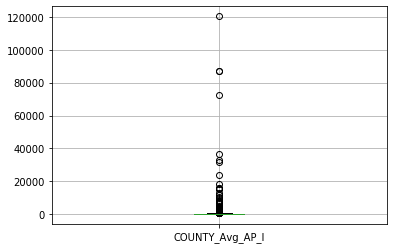

In [84]:
First_review_data.boxplot(column='COUNTY_Avg_AP_I')

In [85]:
##### Model for county

In [86]:
#CTrain_X=
#Ctrain_Y=FINAL_Texas_DATA['']

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_Ctrain, X_Cval, y_Ctrain, y_Cval = train_test_split(FINAL_Texas_DATA,Ctrain_Y,test_size = 0.4,random_state = 123)

In [89]:
y_Ctrain.dtypes

dtype('int64')

In [90]:
X_Ctrain.shape

(3752, 40)

In [91]:
NAICS= pd.DataFrame(X_Ctrain['naics'])

In [92]:
NAICS.shape

(3752, 1)

In [93]:
NAICS.dtypes

naics    object
dtype: object

In [94]:
NAICS['naics'].unique()

array(['621111', '424480', '519190', ..., '4854', '561439', '331222'],
      dtype=object)

In [95]:
#X_Ctrain['naics']=X_Ctrain['naics'].astype(float)
#X_Ctrain['naics']=X_Ctrain.toto_numeric(X_Ctrain['naics'],errors='coerce')

#X_Ctrain.to_numeric(X_Ctrain.naics)
#NAICS = NAICS.apply(NAICS.naics.to_numeric, args=('coerce',))
#NAICS['naics'].astype(str).astype(int)
#NAICS['naics']=NAICS['naics'].astype(float64)
NAICS['naics'] = NAICS['naics'].astype('category')

In [122]:
NAICS.shape

(3752, 1)

In [97]:
#NAICS.to_csv("NAICS.csv")

In [98]:
#ns=pd.read_csv("NAICS.csv")

In [99]:
#NAICS.dropna(subset=["normalized-losses"], axis = 0 , inplace= True)
#NAICS['NAICS']=NAICS['naics'].astype(int)
ns.dtypes
#df['purchase'].astype(str).astype(int)


Unnamed: 0      int64
naics         float64
dtype: object

In [100]:
NS = ns.drop(columns=['Unnamed: 0'])

In [101]:
NS.shape

(3752, 1)

In [108]:
NS.head()

,naics
0,621111.0
1,424480.0
2,519190.0
3,335129.0
4,4529.0


In [105]:
X_Ctrain.head(10)

,state_lfo_-,state_lfo_C,state_lfo_G,state_lfo_N,state_lfo_O,state_lfo_P,state_lfo_S,state_lfo_Z,US_lfo_-,US_lfo_C,...,14,15,16,17,18,19,20,21,22,naics
1130,0,0,0,0,1,0,0,0,0,0,...,-0.090477,-0.098589,0.123522,0.181477,0.237997,0.426839,0.438156,-0.027441,-0.090477,621111
2265,0,0,0,0,0,0,0,1,0,0,...,-0.092898,-0.098589,-0.102081,-0.096246,-0.097243,-0.107156,-0.107301,-0.096392,-0.090477,424480
3462,0,0,0,0,0,0,1,0,1,0,...,-0.105002,-0.098589,-0.098787,-0.091450,-0.092615,-0.100308,-0.100349,-0.093749,-0.090477,519190
883,0,0,0,0,0,0,0,1,0,0,...,-0.102581,-0.098589,-0.102815,-0.096726,-0.097764,-0.108574,-0.108727,-0.097493,-0.090477,335129
3301,0,0,0,0,0,0,0,1,0,0,...,-0.105002,-0.098589,-0.101133,-0.096352,-0.097350,-0.100912,-0.100887,-0.097053,-0.090477,4529
5100,0,1,0,0,0,0,0,0,0,0,...,-0.013012,-0.098589,-0.102941,-0.096850,-0.097894,-0.108708,-0.108864,-0.097493,-0.090477,33231
6178,0,0,0,0,0,0,1,0,0,0,...,-0.105002,-0.098589,-0.098433,-0.094532,-0.094500,-0.086568,-0.086199,-0.096612,-0.090477,23811
2356,0,0,0,0,0,1,0,0,0,0,...,-0.102581,-0.098589,-0.101969,-0.096422,-0.097430,-0.104182,-0.104226,-0.097493,-0.090477,812210
5299,0,1,0,0,0,0,0,0,0,0,...,-0.020275,-0.041814,-0.102934,-0.096846,-0.097887,-0.108687,-0.108842,-0.097493,-0.090477,237310
3947,0,0,0,0,0,1,0,0,0,0,...,-0.105002,-0.098589,-0.060471,-0.069964,-0.068836,-0.016349,-0.014286,-0.095070,-0.090477,4413


In [125]:
X_Ctrain3=pd.concat([NAICS,X_Ctrain],axis=1)
#da.join(db, how='outer').join(dc, how='outer')


In [126]:
X_Ctrain.shape

(3752, 40)

In [128]:
X_Ctrain3.head(10)

,naics,state_lfo_-,state_lfo_C,state_lfo_G,state_lfo_N,state_lfo_O,state_lfo_P,state_lfo_S,state_lfo_Z,US_lfo_-,...,14,15,16,17,18,19,20,21,22,naics
1130,621111,0,0,0,0,1,0,0,0,0,...,-0.090477,-0.098589,0.123522,0.181477,0.237997,0.426839,0.438156,-0.027441,-0.090477,621111
2265,424480,0,0,0,0,0,0,0,1,0,...,-0.092898,-0.098589,-0.102081,-0.096246,-0.097243,-0.107156,-0.107301,-0.096392,-0.090477,424480
3462,519190,0,0,0,0,0,0,1,0,1,...,-0.105002,-0.098589,-0.098787,-0.091450,-0.092615,-0.100308,-0.100349,-0.093749,-0.090477,519190
883,335129,0,0,0,0,0,0,0,1,0,...,-0.102581,-0.098589,-0.102815,-0.096726,-0.097764,-0.108574,-0.108727,-0.097493,-0.090477,335129
3301,4529,0,0,0,0,0,0,0,1,0,...,-0.105002,-0.098589,-0.101133,-0.096352,-0.097350,-0.100912,-0.100887,-0.097053,-0.090477,4529
5100,33231,0,1,0,0,0,0,0,0,0,...,-0.013012,-0.098589,-0.102941,-0.096850,-0.097894,-0.108708,-0.108864,-0.097493,-0.090477,33231
6178,23811,0,0,0,0,0,0,1,0,0,...,-0.105002,-0.098589,-0.098433,-0.094532,-0.094500,-0.086568,-0.086199,-0.096612,-0.090477,23811
2356,812210,0,0,0,0,0,1,0,0,0,...,-0.102581,-0.098589,-0.101969,-0.096422,-0.097430,-0.104182,-0.104226,-0.097493,-0.090477,812210
5299,237310,0,1,0,0,0,0,0,0,0,...,-0.020275,-0.041814,-0.102934,-0.096846,-0.097887,-0.108687,-0.108842,-0.097493,-0.090477,237310
3947,4413,0,0,0,0,0,1,0,0,0,...,-0.105002,-0.098589,-0.060471,-0.069964,-0.068836,-0.016349,-0.014286,-0.095070,-0.090477,4413


In [129]:
#NS.head()

In [115]:
#X_Ctrain2=pd.concat([NS,X_Ctrain],ignore_index = True,axis=1)

In [130]:
#X_Ctrain2.head(10)

In [133]:
#X_Ctrain3=X_Ctrain3.drop(columns=['naics'])

In [134]:
#X_Ctrain=pd.concat([NS,X_Ctrain],axis=1)

In [135]:
X_Ctrain3.head(5)

,state_lfo_-,state_lfo_C,state_lfo_G,state_lfo_N,state_lfo_O,state_lfo_P,state_lfo_S,state_lfo_Z,US_lfo_-,US_lfo_C,...,13,14,15,16,17,18,19,20,21,22
1130,0,0,0,0,1,0,0,0,0,0,...,-0.112493,-0.090477,-0.098589,0.123522,0.181477,0.237997,0.426839,0.438156,-0.027441,-0.090477
2265,0,0,0,0,0,0,0,1,0,0,...,-0.108444,-0.092898,-0.098589,-0.102081,-0.096246,-0.097243,-0.107156,-0.107301,-0.096392,-0.090477
3462,0,0,0,0,0,0,1,0,1,0,...,-0.117193,-0.105002,-0.098589,-0.098787,-0.091450,-0.092615,-0.100308,-0.100349,-0.093749,-0.090477
883,0,0,0,0,0,0,0,1,0,0,...,-0.117121,-0.102581,-0.098589,-0.102815,-0.096726,-0.097764,-0.108574,-0.108727,-0.097493,-0.090477
3301,0,0,0,0,0,0,0,1,0,0,...,-0.100925,-0.105002,-0.098589,-0.101133,-0.096352,-0.097350,-0.100912,-0.100887,-0.097053,-0.090477


In [ ]:
X_Ctrain=X_Ctrain.dropna(axis=0, how='all')

In [ ]:
XM = X_Ctrain.loc[X_Ctrain.isnull().mean(axis=1) < .1, :] 

In [ ]:
X_Ctrain = X_Ctrain.loc[X_Ctrain.isnull().mean(axis=1) < .1, :] 

In [ ]:
XM.fillna(0)

In [ ]:
XM.isnull().sum()

In [ ]:
X_Ctrain.fillna(0)

In [ ]:
X_Ctrain.isnull().sum()

In [ ]:
X_Ctrain.to_csv("X_Ctrain.csv")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics, model_selection
from sklearn import datasets

In [ ]:
linreg = LinearRegression()


In [ ]:
linreg.fit(X_Ctrain, y_Ctrain) #fitting the model 

In [ ]:
y_pred_County = linreg.predict(X_Cval)
print(metrics.mean_squared_error(y_Cval, y_pred_County))
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_train, y_pred_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
lm = GridSearchCV(linreg, hyperparameters, cv=5, verbose=0) #fitting the Gridsearch model


In [ ]:
linreg

In [ ]:
lm

In [ ]:
best_model = lm.fit(X_Ctrain, y_Ctrain)

In [ ]:
best_model = linreg.fit(X_Ctrain, y_Ctrain,)

In [ ]:
y_pred_County = best_model.predict(X_Cval)
print(metrics.mean_squared_error(y_Cval, y_pred_County))